# Determine shift between two time signals


The approach is based on the **DFT Shifting Theorem**: <rb>
https://brianmcfee.net/dstbook-site/content/ch06-dft-properties/Shifting.html


The book **Radar Signal Processing for Autonomous Driving** dedicates a whole chapter to state of the art DOA algorithms: <br>
https://hsb-rhein-waal.digibib.net/search/katalog/list?q-ti=Radar+Signal+Processing+for+Autonomous+Driving


Another approach ("random" selection): **A-CRNN-Based Method for Coherent DOA Estimation with Unknown Source Number (Article)** <br>
https://www.mdpi.com/1424-8220/20/8/2296



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


In [2]:

# Load the WAV file
filename = 'Data/CantinaBand3.wav'

sample_rate, data = wavfile.read(filename)

N = len(data)

dt = sample_period = 1/sample_rate

print(f"{N             = } samples")
print(f"{sample_rate   = } Hz")
print(f"sample_period = {sample_period*1e6:.2f} us")



N             = 66150 samples
sample_rate   = 22050 Hz
sample_period = 45.35 us


In [7]:
# Shorten the time series to be able to shift.

shift1 = 0
shift2 = 20

#data1a = data[10000:50000]
#data1b = data[10000+shift1:50000+shift1]
#data1 = (data1a + data1b)/2

data1 = data[10000+shift1:50000+shift1]
data2 = data[10000+shift2:50000+shift2]

N1 = len(data1)
N2 = len(data2)

print(f"{N1 = } samples in time")
print(f"{N2 = } samples in time")

# Take the Fourier transform
fft1 = np.fft.fft(data1)
fft2 = np.fft.fft(data2)

M1 = len(fft1)
M2 = len(fft2)

print(f"{M1 = } points in freq.")
print(f"{M2 = } points in freq.")

assert N1 == N2 == M1 == M2

N = N1

nseq = np.arange(N)

# Get the frequency values corresponding to the FFT data
fft_freq_correct = np.fft.fftfreq(N, 1/sample_rate)
print(f"{fft_freq_correct[:5] = }")

# Select the freq. axis for plotting.

# fft_freq = fft_freq_correct
fft_freq = nseq
print(f"{fft_freq[:5] = }")


N1 = 40000 samples in time
N2 = 40000 samples in time
M1 = 40000 points in freq.
M2 = 40000 points in freq.
fft_freq_correct[:5] = array([0.     , 0.55125, 1.1025 , 1.65375, 2.205  ])
fft_freq[:5] = array([0, 1, 2, 3, 4])


In [8]:
# arg = 2pi m/N*d, d = shift

In [9]:
mseq = np.arange(N)
arg = np.angle(fft1/fft2)
dn = -arg/(2*np.pi*mseq)*N

/tmp/ipykernel_6787/1030971007.py:3: RuntimeWarning: invalid value encountered in divide
  dn = -arg/(2*np.pi*mseq)*N


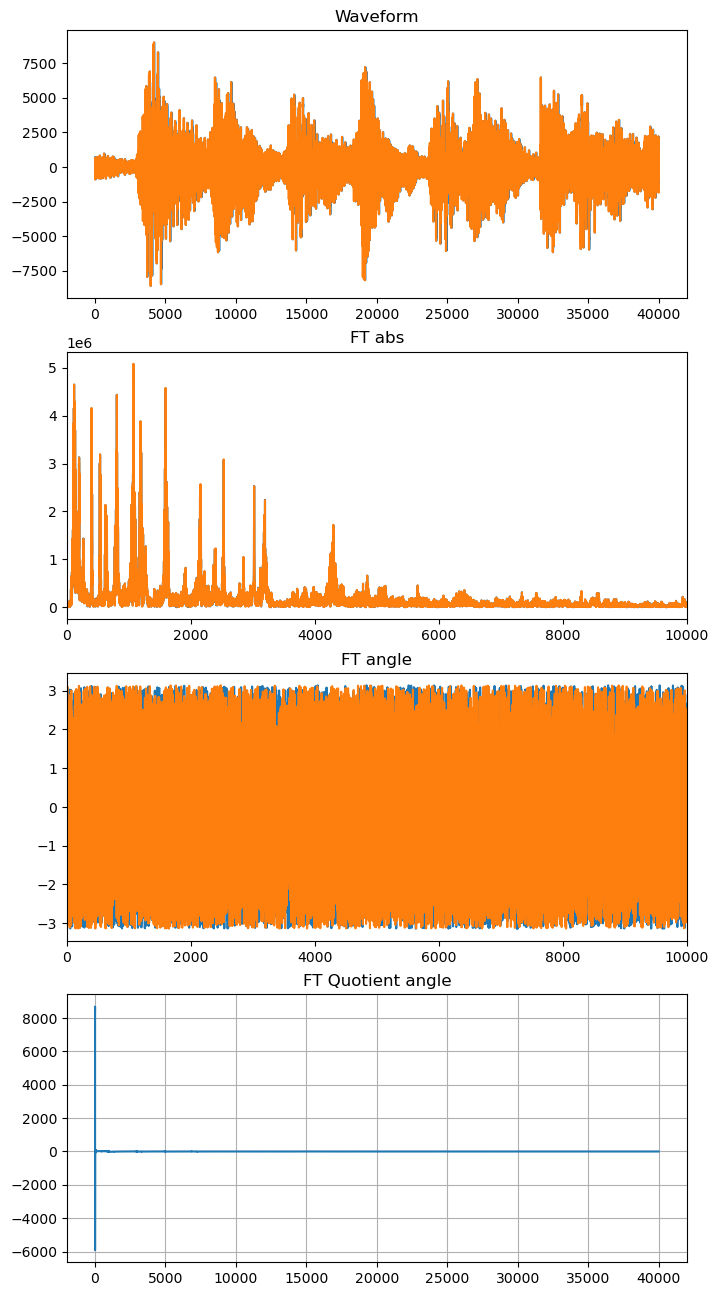

In [10]:

#flim = sample_rate/2
flim = 10000



# Plot the wave and FFT data
fig, axs = plt.subplots(4, 1, figsize=(8,16))

axs[0].plot(data1)
axs[0].plot(data2)
axs[0].set_title('Waveform')

axs[1].plot(fft_freq, np.abs(fft1))
axs[1].plot(fft_freq, np.abs(fft2))
axs[1].set_title('FT abs')
axs[1].set_xlim([0, flim])
#axs[1].set_xlim([0, sample_rate/2])

axs[2].plot(fft_freq, np.angle(fft1))
axs[2].plot(fft_freq, np.angle(fft2))
axs[2].set_title('FT angle')
#axs[2].set_xlim([0, sample_rate/2])
axs[2].set_xlim([0, flim])

#axs[3].plot(fft_freq[10000:-10000], 
#            np.angle(fft1[10000:-10000]/fft2[10000:-10000])/fft_freq[10000:-10000])
axs[3].plot(fft_freq,dn)
axs[3].set_title('FT Quotient angle')
#axs[2].set_xlim([0, sample_rate/2])
#axs[3].set_xlim([0, N/2/shift])
#axs[3].set_ylim([0, 2*shift])
axs[3].grid(True)
plt.show()

In [11]:
np.angle(fft1/fft2)/fft_freq[2000]

array([-0.        , -0.00066286, -0.00136384, ..., -0.00139265,
        0.00136384,  0.00066286])

## Low-pass Filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html